In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

# Set the seaborn style
style.use('seaborn')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

C:\Users\bsmun\AppData\Local\Temp\ipykernel_15664\4204477551.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


In [2]:
# i. Read the dataset into a pandas dataframe
titanic_df = pd.read_csv('train.csv') 


In [3]:
# ii. Check for duplicates and handle them
duplicates = titanic_df.duplicated()
titanic_df = titanic_df[~duplicates]

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [5]:
titanic_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
# iii. Check for missing values and impute them
missing_values = titanic_df.isnull().sum()

In [7]:
titanic_df.drop('Cabin',axis=1,inplace=True)
titanic_df.Age.replace(np.nan,titanic_df.Age.mean(),inplace=True)
titanic_df.Embarked.replace(np.nan,titanic_df.Embarked.mode()[0], inplace=True)

titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

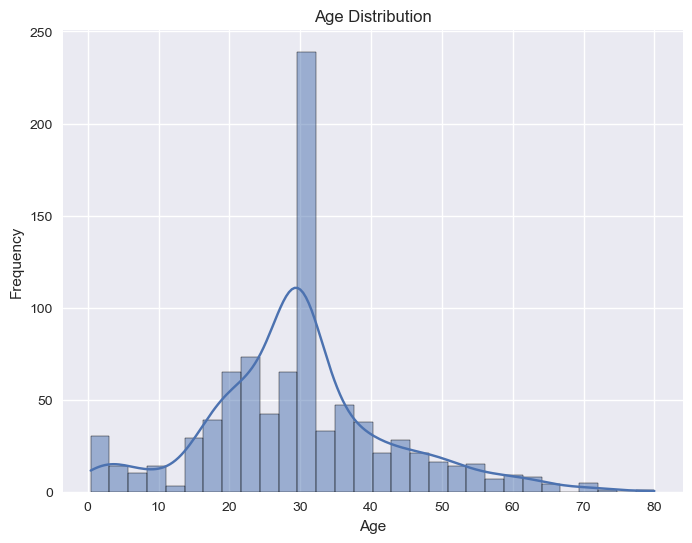

In [8]:
# iv. Perform univariate analysis using suitable plots / charts
# Example: Histogram for Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(titanic_df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

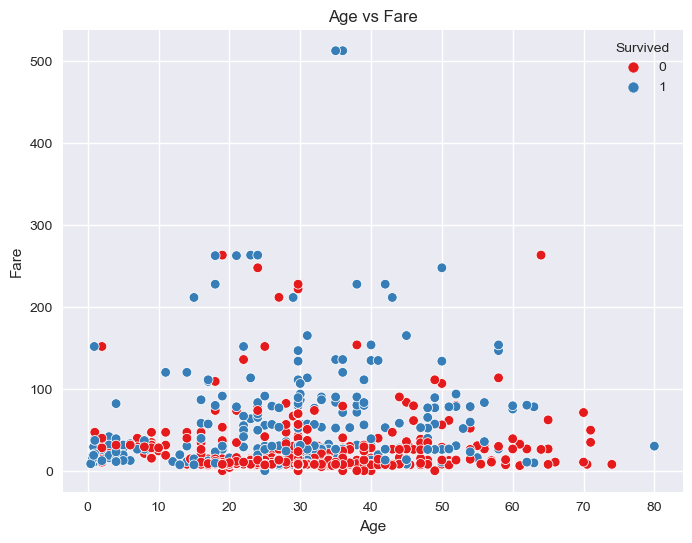

In [9]:
# v. Perform bi-variate analysis using suitable plots / charts
# Example: Scatter plot for Age vs Fare
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', data=titanic_df, hue='Survived', palette='Set1')
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', loc='upper right')
plt.show()

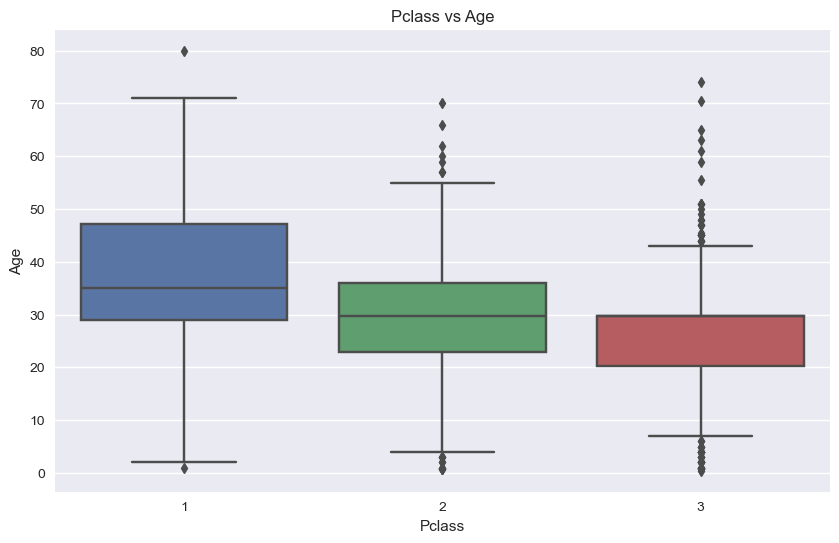

In [10]:
# vi. Show patterns not only between independent and dependent features but also within independent features
# Example: Box plot for Pclass vs Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=titanic_df)
plt.title('Pclass vs Age')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

In [11]:
# vii. Mention your observations in markdown cells below each visualization

# viii. Use groupby, value_counts, mean, var, and other suitable functions to extract important information / findings
# Example: Group by Pclass and calculate the mean Fare
mean_fare_by_class = titanic_df.groupby('Pclass')['Fare'].mean()
print('Mean Fare by Class:\n', mean_fare_by_class)

Mean Fare by Class:
 Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


In [12]:
# Observation for Age Distribution:
# The age distribution is slightly right-skewed, with a peak around 30-35 years. 
# Most passengers are in the age range of 20-40 years.

# Observation for Age vs Fare Scatter Plot:
# There doesn't seem to be a clear correlation between age and fare. 
# However, it appears that some passengers who paid higher fares survived.

# Observation for Pclass vs Age Box Plot:
# There is a noticeable difference in the median age between passenger classes.
# First-class passengers tend to be older on average compared to second and third-class passengers.

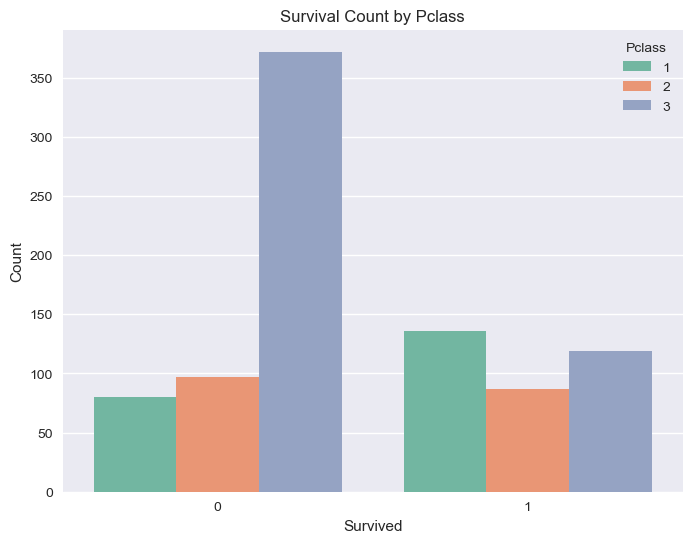

In [13]:
# Additional Univariate Analysis:
#Countplot for Survived vs Pclass
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Pclass', data=titanic_df, palette='Set2')
plt.title('Survival Count by Pclass')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

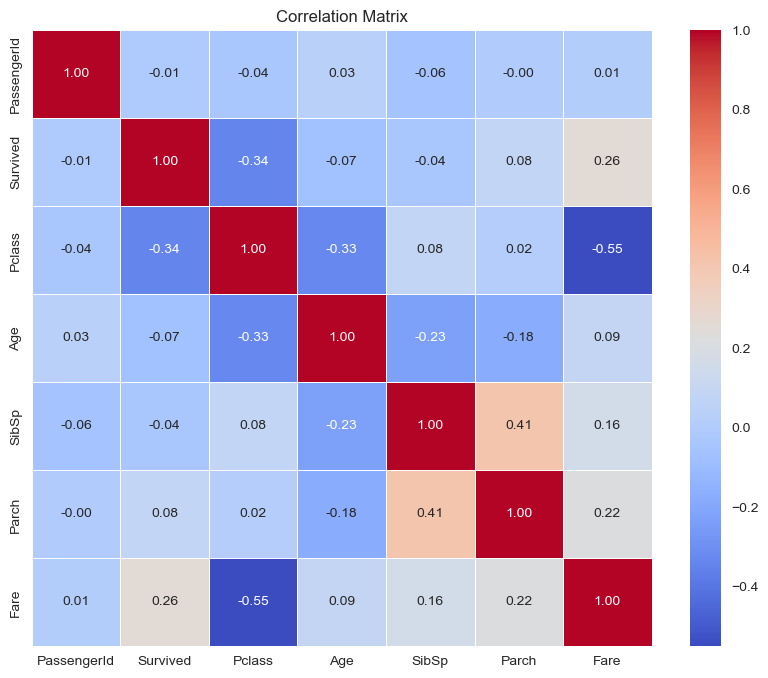

In [14]:
# Observation for Survived vs Pclass Count Plot:
# The count plot shows that a higher proportion of first-class passengers survived compared to other classes.

# Additional Bivariate Analysis:
# Example: Heatmap for correlation matrix
correlation_matrix = titanic_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [15]:
# Observation for Correlation Matrix Heatmap:
# The heatmap visualizes the correlation between numerical features. For example, 'Pclass' and 'Fare' are negatively correlated,
# suggesting that higher-class passengers tend to pay higher fares.


In [16]:
# Additional Insights using Groupby and Aggregation:
# Example: Mean age of passengers who survived vs those who did not
mean_age_by_survived = titanic_df.groupby('Survived')['Age'].mean()
print('Mean Age by Survival:\n', mean_age_by_survived)

Mean Age by Survival:
 Survived
0    30.415100
1    28.549778
Name: Age, dtype: float64


In [17]:
# Observation for Mean Age by Survival:
# The mean age of passengers who survived is slightly lower than those who did not survive.

In [18]:
# Additional Exploration with Value Counts:
# Example: Count of passengers by Embarked port
embarked_counts = titanic_df['Embarked'].value_counts()
print('Count of Passengers by Embarked Port:\n', embarked_counts)


Count of Passengers by Embarked Port:
 S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [19]:
# Example: Count of passengers by Sex
sex_counts = titanic_df['Sex'].value_counts()
print('Count of Passengers by Sex:\n', sex_counts)


Count of Passengers by Sex:
 male      577
female    314
Name: Sex, dtype: int64


In [20]:
# Observation based on Value Counts:
# - Most passengers boarded from port 'S' (Southampton).
# - There were more male passengers than female passengers on the Titanic.


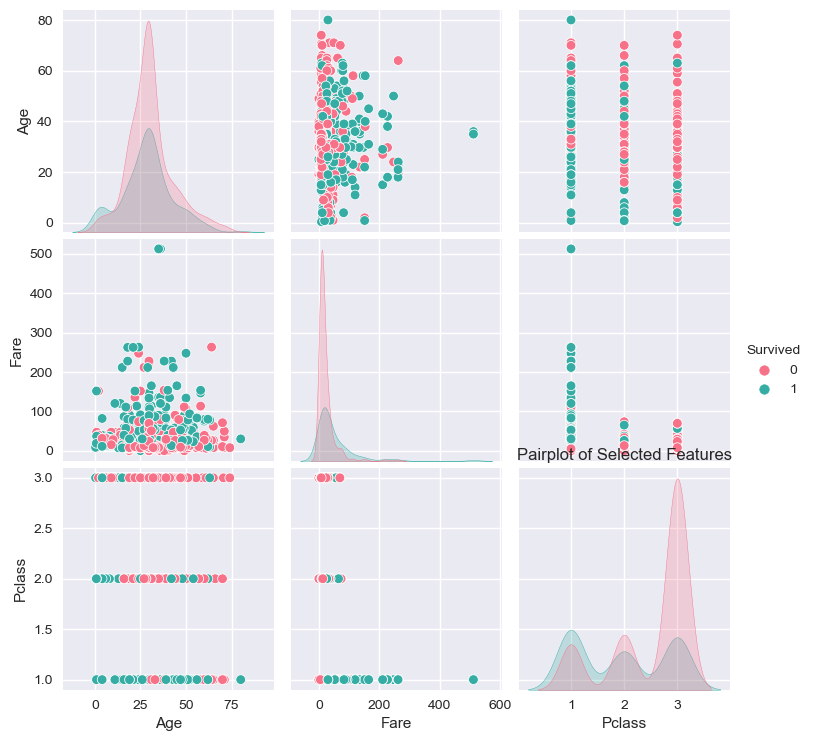

In [21]:
# Further Bivariate Analysis:
# Example: Pairplot for selected numerical features
selected_features = ['Age', 'Fare', 'Pclass', 'Survived']
sns.pairplot(titanic_df[selected_features], hue='Survived', palette='husl')
plt.title('Pairplot of Selected Features')
plt.show()


In [22]:
# Observation for Pairplot:
# The pairplot provides scatterplots for selected numerical features, with different colors indicating survival status.
# It can help identify potential patterns or relationships between variables.


In [23]:
# Groupby Analysis:
# Example: Count of passengers by both Pclass and Sex
class_sex_counts = titanic_df.groupby(['Pclass', 'Sex']).size().unstack()
print('Count of Passengers by Pclass and Sex:\n', class_sex_counts)


Count of Passengers by Pclass and Sex:
 Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


In [24]:
# Observation for Count of Passengers by Pclass and Sex:
# The groupby analysis shows the count of passengers categorized by both class and gender, providing a detailed overview.

# Conclusion:
# The analysis conducted so far provides insights into various aspects of the Titanic dataset.
# Further exploration and analysis can be performed based on specific questions or hypotheses.

# Remember to adapt the analysis based on your dataset and research questions.